In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
pwd

'C:\\Users\\sreer\\Edure\\Data Science\\deep learning\\Transfer Learning'

In [54]:
target_spot = glob('cotton/Cotton plant/Cotton plant/Target spot/*.jpg')
Powdery_Mildew = glob('cotton/Cotton plant/Cotton plant/Powdery Mildew/*.jpg')
Healthy = glob('cotton/Cotton plant/Cotton plant/Healthy/*.jpg')
Bacterial_Blight = glob('cotton/Cotton plant/Cotton plant/Bacterial Blight/*.jpg')
Army_worm = glob('cotton/Cotton plant/Cotton plant/Army worm/*.jpg')
Aphids = glob('cotton/Cotton plant/Cotton plant/Aphids/*.jpg')

In [28]:
len(target_spot)

390

In [32]:
len(Powdery_Mildew)

400

In [46]:
len(Healthy)

390

In [42]:
len(Bacterial_Blight)

400

In [50]:
len(Army_worm)

400

In [56]:
len(Aphids)

400

In [60]:
classes = {0: 'target_spot', 1: 'Powdery_Mildew', 2: 'Aphids', 3: 'Bacterial_Blight', 4: 'Army_worm' , 5: 'Healthy'}       #Define class

In [62]:
images = []
labels = []

for i in target_spot:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in Powdery_Mildew:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in Aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in Bacterial_Blight:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in Army_worm:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

for i in Healthy:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

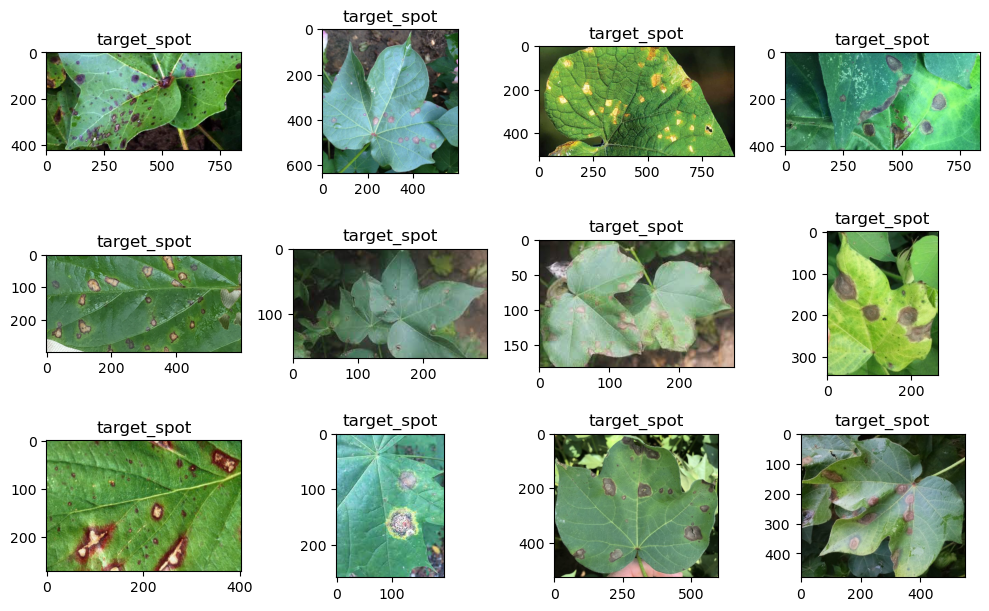

In [64]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [66]:
images,labels = shuffle(images,labels)                         #Shuffle images

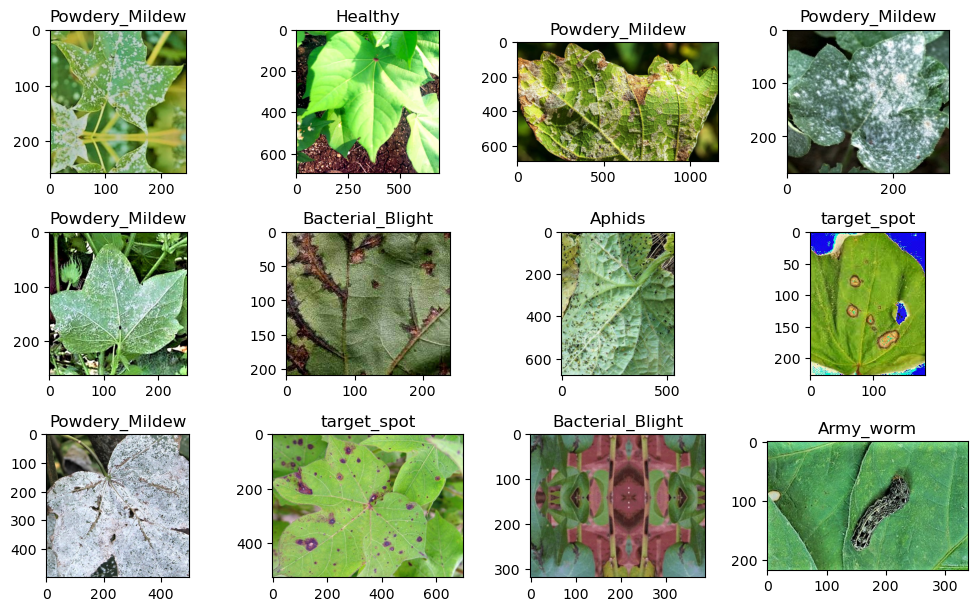

In [68]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [71]:
 X = []
                                                        #Resize images
for i in images:
    X.append(resize(i, (224,224,3)))

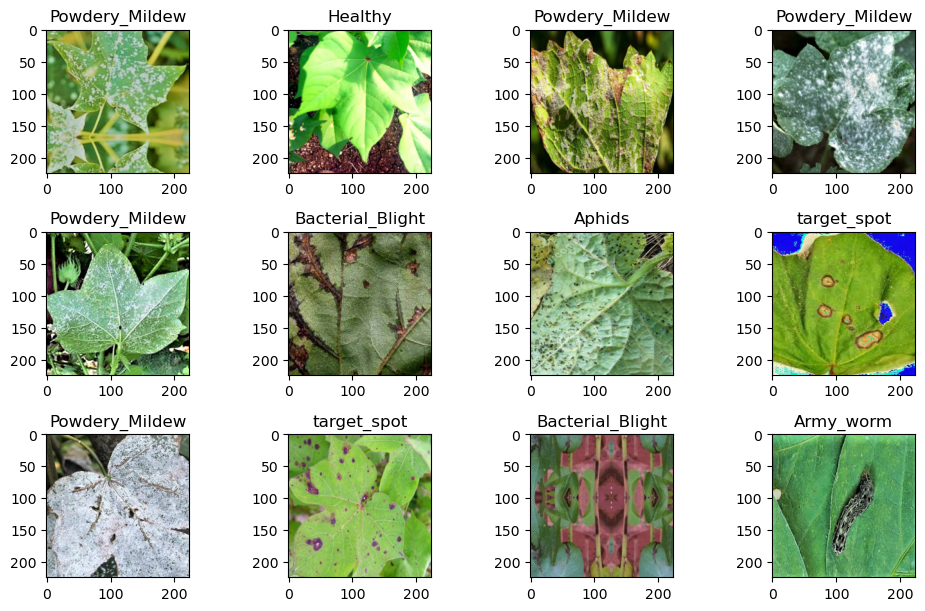

In [72]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [73]:
X = np.array(X)
y = np.array(labels)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [75]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [76]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1767ce54d40>

In [83]:
num_of_classes = 5

In [85]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [87]:
y_test

array([5, 1, 3, 1, 0, 1, 3, 1, 1, 2, 0, 3, 3, 5, 2, 0, 1, 0, 1, 2, 2, 2,
       3, 4, 2, 5, 4, 0, 1, 1, 5, 3, 3, 0, 1, 1, 2, 2, 5, 2, 0, 1, 1, 3,
       0, 5, 2, 2, 2, 0, 0, 0, 3, 4, 3, 4, 2, 4, 5, 3, 2, 5, 4, 4, 5, 4,
       1, 5, 4, 4, 0, 5, 1, 2, 5, 3, 0, 3, 5, 1, 0, 3, 2, 2, 2, 0, 0, 4,
       2, 2, 4, 5, 4, 4, 2, 4, 3, 5, 1, 3, 1, 4, 0, 0, 0, 4, 5, 1, 3, 1,
       2, 2, 4, 3, 1, 3, 0, 2, 1, 0, 5, 3, 2, 1, 2, 0, 4, 4, 0, 4, 4, 3,
       0, 3, 2, 1, 3, 5, 4, 1, 3, 2, 5, 5, 3, 2, 3, 0, 5, 1, 4, 5, 1, 4,
       5, 4, 0, 3, 0, 4, 3, 5, 2, 2, 3, 4, 0, 4, 1, 0, 5, 0, 0, 3, 3, 4,
       4, 3, 5, 1, 5, 3, 4, 2, 3, 0, 0, 0, 0, 2, 1, 4, 5, 0, 4, 4, 5, 0,
       4, 5, 4, 2, 3, 1, 2, 0, 1, 1, 3, 1, 0, 3, 1, 5, 4, 4, 5, 4, 5, 0,
       2, 2, 0, 2, 3, 2, 5, 3, 2, 5, 1, 2, 1, 5, 0, 1, 5, 2, 2, 4, 2, 5,
       1, 1, 5, 0, 2, 2, 0, 4, 1, 4, 4, 5, 5, 1, 2, 1, 3, 5, 4, 5, 1, 5,
       1, 2, 5, 4, 4, 4, 2, 0, 1, 3, 2, 3, 4, 4, 4, 0, 0, 0, 4, 0, 0, 3,
       1, 2, 1, 3, 1, 5, 2, 1, 2, 1, 4, 4, 3, 2, 2,

In [89]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [91]:
from tensorflow import keras
from tensorflow.keras import Sequential,layers

In [93]:
model = keras.models.Sequential([
        keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),                    
        keras.layers.Dense(6,activation= 'softmax')
])

C:\Users\sreer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [97]:
model.fit(X_train,y_train, epochs = 10,validation_split=0.1,batch_size=16)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.3790 - loss: 1.9978 - val_accuracy: 0.6702 - val_loss: 0.9897
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.8050 - loss: 0.6256 - val_accuracy: 0.7277 - val_loss: 0.7492
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9116 - loss: 0.2821 - val_accuracy: 0.7592 - val_loss: 0.7622
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.9662 - loss: 0.1263 - val_accuracy: 0.6859 - val_loss: 1.0677
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.9631 - loss: 0.1298 - val_accuracy: 0.7435 - val_loss: 0.9659
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 220ms/step - accuracy: 0.9870 - loss: 0.0649 - val_accuracy: 0.7801 - val_loss: 0.9119
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.9975 - loss: 0.0148 - val_accuracy: 0.8063 - val_loss: 0.9619
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.9998 - loss: 0

In [98]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [99]:
y_pred = [np.argmax(i) for i in y_pred]

In [100]:
accuracy_score(y_test,y_pred)

0.7962184873949579

<Axes: >

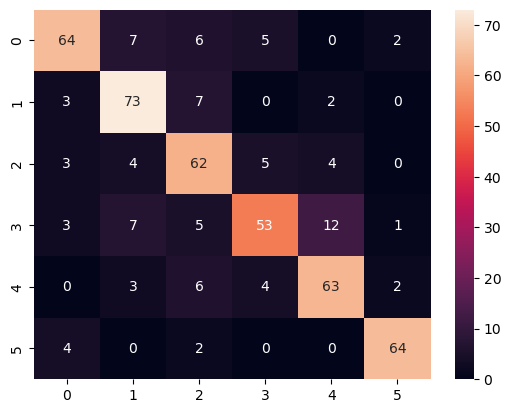

In [101]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80        84
           1       0.78      0.86      0.82        85
           2       0.70      0.79      0.75        78
           3       0.79      0.65      0.72        81
           4       0.78      0.81      0.79        78
           5       0.93      0.91      0.92        70

    accuracy                           0.80       476
   macro avg       0.80      0.80      0.80       476
weighted avg       0.80      0.80      0.80       476

